In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

In [2]:
omega1 = 1
omega2 = 5
omega3 = 10

amp1 = 2
amp2 = 1
amp3 = 0.5

f1 = lambda t: amp1*np.sin(2*np.pi*t*omega1)
f2 = lambda t: amp1*np.sin(2*np.pi*t*omega2)
f3 = lambda t: amp1*np.sin(2*np.pi*t*omega3)

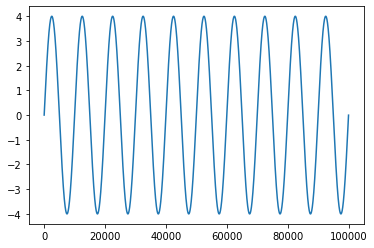

In [9]:
fs = 10e3
T = 1e5

time = np.arange(T) / fs
ts1 = f1(time)
ts2 = f2(time)
ts3 = f3(time)
ts = amp1*ts1+amp2*ts2+amp3*ts3
plt.plot(amp1*ts1)

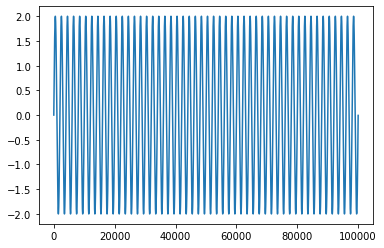

In [10]:
plt.plot(amp2*ts2)

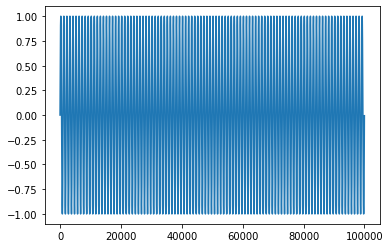

In [11]:
plt.plot(amp3*ts3)

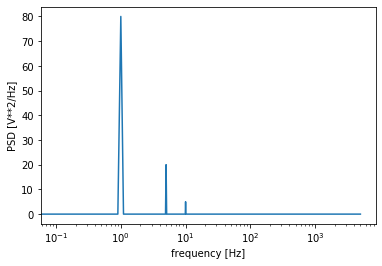

In [4]:
f, Pxx_den = signal.periodogram(ts, fs)
plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xscale('log')
# plt.yscale('log')
plt.show()

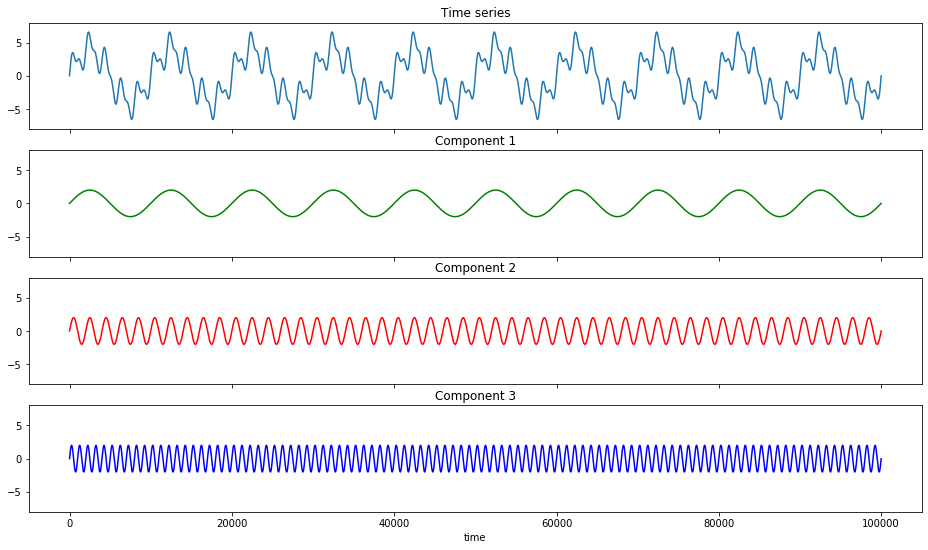

In [5]:
fig, ax= plt.subplots(nrows=4, ncols = 1, figsize=(16,9), sharex=True, sharey=True,)
# subplots_adjust(hspace=1.0, wspace=1.0)


ax[0].plot(ts)
ax[1].plot(ts1, color='g')
ax[2].plot(ts2, color='r')
ax[3].plot(ts3, color='b')

ax[0].set_title('Time series')
ax[1].set_title('Component 1')
ax[2].set_title('Component 2')
ax[3].set_title('Component 3')


ax[3].set_xlabel('time')

for i in range(len(ax)):
    ax[i].set_ylim((-8,8))

plt.savefig('example.png', transparent=True)

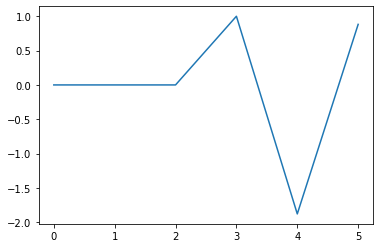

In [44]:
sos = signal.butter(100, 100, 'lowpass', fs=fs, output='sos')
plt.plot(sos[0,:])


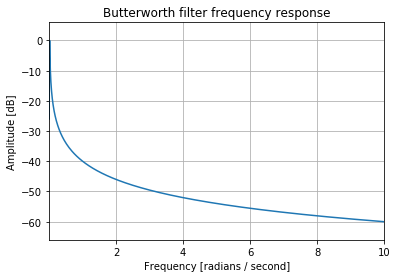

In [32]:
b, a = signal.butter(1, [0.01,0.02], 'bandpass',  analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
# plt.axvline([10,200], color='green') # cutoff frequency
plt.show()

10000.0

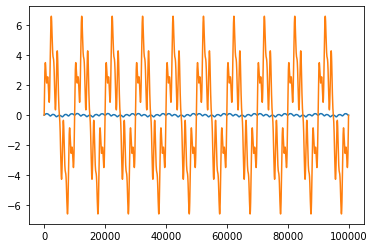

In [119]:
sos = signal.butter(1, [2.8,2.9],
                    'bandpass',
                    fs=fs, output='sos')
filtered = signal.sosfilt(sos, ts)
plt.plot(filtered)
plt.plot(ts)

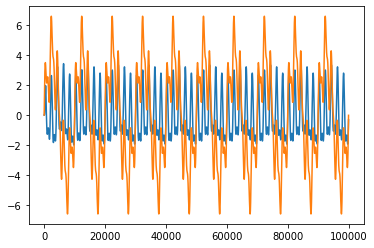

In [87]:
N, Wn = signal.buttord([2, 20],
                       [0.0001, 100], 
                       1, 40, False,
                       fs=fs)
sos = signal.butter(N, Wn, 'bandpass', fs=fs, output='sos')
filtered = signal.sosfilt(sos, ts)
plt.plot(filtered)
plt.plot(ts)

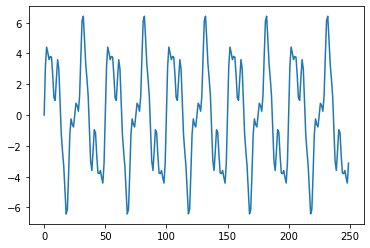

In [177]:
fs = 50 # sample rate in Hz

omega1 = 2
omega2 = 5
omega3 = 10

amp1 = 2
amp2 = 1
amp3 = 0.5

f1 = lambda t: amp1*np.sin(2*np.pi*t*omega1)
f2 = lambda t: amp1*np.sin(2*np.pi*t*omega2)
f3 = lambda t: amp1*np.sin(2*np.pi*t*omega3)

T = 5 # seconds
n = int(T*fs) # total number of samples
t_arr = np.linspace(0, T, n, endpoint=False)
ts1 = f1(t_arr)
ts2 = f2(t_arr)
ts3 = f3(t_arr)
ts = amp1*ts1+amp2*ts2+amp3*ts3
plt.plot(ts)

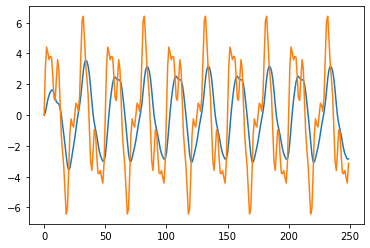

In [178]:


sos = signal.butter(1, [1,2], 
                    'bandpass', 
                    fs=fs, 
                    analog=False,
                    output='sos')

plt.plot(signal.sosfilt(sos, ts))
plt.plot(ts)

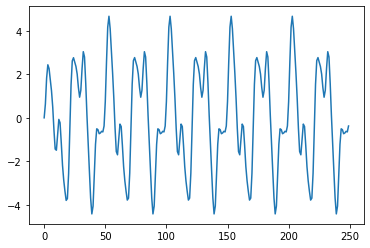

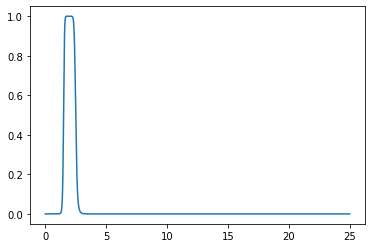

In [304]:
b,a = signal.butter(5, [1.5,2.5], 'bandpass', fs=fs, analog=False)
# b,a = signal.butter(20, 3, 'lowpass', fs=fs, analog=False)

w, h = signal.freqz(b,a, fs=fs, worN=800000)
# plt.plot(w, np.abs(h)**2)
# plt.plot(signal.sosfilt(sos, ts))
# plt.plot(ts)
plt.plot(w, np.abs(h)**2)


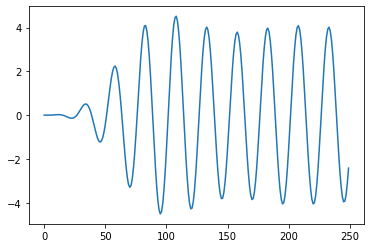

In [305]:
plt.plot(signal.lfilter(b,a,ts))

In [ ]:
# https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units





In [20]:
1/0.035/12

2.380952380952381